# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**Disclaimer:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview
This notebook explores Dandiset 001195, which contains data supporting the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" by Christopher R. Lee, Gillian A. Matthews, Mackenzie E. Lemieux, Elizabeth M. Wasserlein, Matilde Borio, Raymundo L. Miranda, Laurel R. Keyes, Gates P. Schneider, Caroline Jia, Andrea Tran, Faith Aloboudi, May G. Chan, Enzo Peroni, Grace S. Pereira, Alba L López-Moraga, Anna Pallé, Eyal Y. Kimchi, Nancy Padilla-Coreano, Romy Wichmann, Kay M. Tye.

The Dandiset includes in vivo calcium imaging data with supporting behavioral videos and ex vivo patch-clamp electrophysiology recordings.

You can find the Dandiset on the DANDI Archive at: https://dandiarchive.org/dandiset/001195

## Notebook Overview
This notebook will cover the following steps:
1.  Loading the Dandiset using the DANDI API.
2.  Loading an NWB file from the Dandiset.
3.  Displaying metadata from the NWB file.
4.  Loading and visualizing electrophysiology data from the NWB file.
5.  Loading and visualizing histology images from the NWB file.
6.  Summarizing findings and suggesting future directions for analysis.

## Required Packages
The following packages are required to run this notebook:
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

## Load the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733

Found 230 assets in the dataset

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb


## Load an NWB file

We will load the following NWB file: `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb`

The URL for this asset is: https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/

In [3]:
# Load
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

Session description: episodic stimulation
Identifier: a18b081c-3b63-45df-b702-fc3640aef3de
Session start time: 2015-03-24 13:41:14-07:00


## Load and visualize electrophysiology data

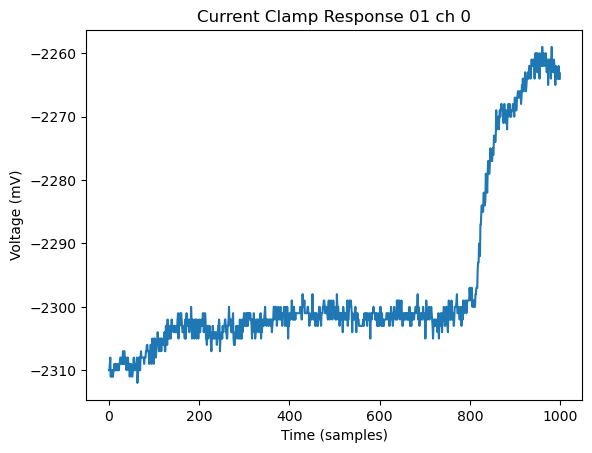

In [4]:
# Plot current clamp data
data = nwb.acquisition["current_clamp-response-01-ch-0"].data[:1000]
plt.plot(data)
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (mV)")
plt.title("Current Clamp Response 01 ch 0")
plt.show()

## Load and visualize histology images

Plotting image: Histology Image 1


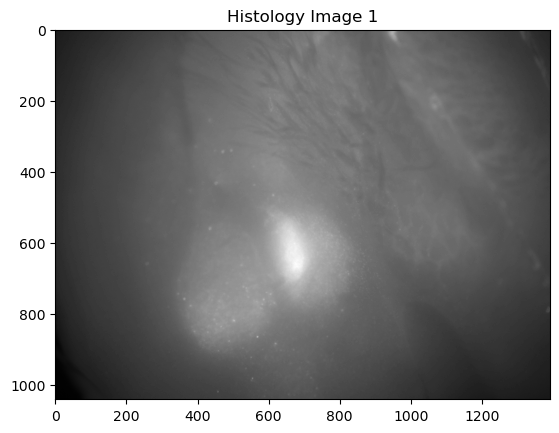

In [5]:
# Get histology images
images = nwb.acquisition["histology_images"]

# Plot the first image
if images.images:
  for img_name, img_data in images.images.items():
    print(f"Plotting image: {img_name}")
    plt.imshow(img_data.data[:], cmap='gray') # Display the first channel if it's a multi-channel image
    plt.title(img_name)
    plt.show()
    break
else:
  print("No images found in histology_images")

## Summary and Future Directions
This notebook demonstrated how to load and visualize data from Dandiset 001195. We loaded an NWB file and displayed electrophysiology data and histology images.

Future directions for analysis could include:
*   Performing more in-depth analysis of the electrophysiology data, such as spike detection and spike sorting.
*   Analyzing the behavioral videos to correlate behavior with neural activity.
*   Comparing the data in this Dandiset with data from other Dandisets.